In [50]:
import os

In [72]:
import glob

In [75]:
import zipfile

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import xarray as xr

In [12]:
import boto3

In [96]:
from IPython.display import Image

In [89]:
from brainscore import knownfile

In [4]:
da_mome = xr.open_dataarray("monkobjectome_behavior.nc")
da_mome

<xarray.DataArray (trial: 273852)>
[273852 values with dtype=bool]
Coordinates:
    bgname              (trial) object ...
    bgphi               (trial) float64 ...
    bgpsi               (trial) float64 ...
    bgscale             (trial) float64 ...
    category            (trial) object ...
    id                  (trial) object ...
    internal_canonical  (trial) float64 ...
    obj                 (trial) object ...
    rxy                 (trial) float64 ...
    rxz                 (trial) float64 ...
    ryz                 (trial) float64 ...
    s                   (trial) float64 ...
    texture             (trial) float64 ...
    texture_mode        (trial) float64 ...
    tname               (trial) object ...
    tx                  (trial) float64 ...
    ty                  (trial) float64 ...
    tz                  (trial) float64 ...
    RT                  (trial) int64 ...
    Response            (trial) object ...
    StimDuration        (trial) int64 ...
    St

In [5]:
len(da_mome["Stimulus"])

273852

In [6]:
len(np.unique(da_mome["Stimulus"]))

24796

In [8]:
for stim in da_mome["Stimulus"].values[:10]:
    print(stim)
    sp = stim.split("/")
    print(sp[3])

https://s3.amazonaws.com/objectome32_final/23ee8cfc91e68912e2c0ba347005cbc7337b0838.png
objectome32_final
https://s3.amazonaws.com/objectome32_final/71fe1eaf3c8d104baba4747caa7040a009d4e393.png
objectome32_final
https://s3.amazonaws.com/objectome32_final/9a9f92bf308bb3eb7b6f8e87f3e8658731030add.png
objectome32_final
https://s3.amazonaws.com/objectome32_final/20d710e5481e0c55a304506e889592365803893d.png
objectome32_final
https://s3.amazonaws.com/objectome32_final/76082e4901531cc1ca0a47685301032758d336dd.png
objectome32_final
https://s3.amazonaws.com/objectome32_final/15a1c66900c32f1d09084b241099c51706fc365a.png
objectome32_final
https://s3.amazonaws.com/objectome32_final/37d2131bb44b6c35bdea7c8600bb577bccf2f169.png
objectome32_final
https://s3.amazonaws.com/objectome32_final/221f4843c4b5855ef1fc8b8bbcb9c8c1d91abe8d.png
objectome32_final
https://s3.amazonaws.com/objectome32_final/fedbe87dc039129c1523e6f308a5d7cf57b32773.png
objectome32_final
https://s3.amazonaws.com/objectome32_final/17f

In [9]:
bucket_list = list(map(lambda stim: stim.split("/")[3], da_mome["Stimulus"].values))
bucket_list

['objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectome32_final',
 'objectom

In [10]:
all_buckets = np.unique(bucket_list)
all_buckets

array(['objectome32_final', 'objectome64s100'], dtype='<U17')

In [55]:
da_mome.load()

<xarray.DataArray (trial: 273852)>
array([False,  True, False, ...,  True,  True,  True])
Coordinates:
    bgname              (trial) object 'DH204SN.jpg' 'INTERIOR_27ST.jpg' ...
    bgphi               (trial) float64 -77.9 16.06 17.78 -73.33 -81.6 174.1 ...
    bgpsi               (trial) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    bgscale             (trial) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    category            (trial) object 'nocategoryset' 'nocategoryset' ...
    id                  (trial) object '23ee8cfc91e68912e2c0ba347005cbc7337b0838' ...
    internal_canonical  (trial) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    obj                 (trial) object 'weimaraner' ...
    rxy                 (trial) float64 58.24 115.9 173.0 -130.5 -23.99 ...
    rxz                 (trial) float64 150.0 164.6 -12.5 -70.74 -151.2 ...
    ryz                 (trial) float64 -103.0 -83.51 -126.4 -70.55 115.8 ...
    s                   (trial) float64 1.429 1.672 

In [56]:
da_mome

<xarray.DataArray (trial: 273852)>
array([False,  True, False, ...,  True,  True,  True])
Coordinates:
    bgname              (trial) object 'DH204SN.jpg' 'INTERIOR_27ST.jpg' ...
    bgphi               (trial) float64 -77.9 16.06 17.78 -73.33 -81.6 174.1 ...
    bgpsi               (trial) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    bgscale             (trial) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    category            (trial) object 'nocategoryset' 'nocategoryset' ...
    id                  (trial) object '23ee8cfc91e68912e2c0ba347005cbc7337b0838' ...
    internal_canonical  (trial) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    obj                 (trial) object 'weimaraner' ...
    rxy                 (trial) float64 58.24 115.9 173.0 -130.5 -23.99 ...
    rxz                 (trial) float64 150.0 164.6 -12.5 -70.74 -151.2 ...
    ryz                 (trial) float64 -103.0 -83.51 -126.4 -70.55 115.8 ...
    s                   (trial) float64 1.429 1.672 

In [61]:
uq_stim = np.unique(da_mome["Stimulus"])
uq_stim

array(['https://s3.amazonaws.com/objectome32_final/0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd.png',
       'https://s3.amazonaws.com/objectome32_final/000bf137451cf6aa1a04c33af5af6d95ffd78886.png',
       'https://s3.amazonaws.com/objectome32_final/000dc710704f4788fbde57539b6ea10e8ce743ff.png',
       ...,
       'https://s3.amazonaws.com/objectome64s100/ff3dff61244d8881126214ca95e6f47793a9d698.png',
       'https://s3.amazonaws.com/objectome64s100/ffb6794cec9e38f34fcec939b2db0320a03a2777.png',
       'https://s3.amazonaws.com/objectome64s100/ffe198db9d499fe2a4ab7bbdffaf3a51c4ac80c9.png'],
      dtype=object)

In [20]:
len(uq_stim)

24796

In [22]:
da_mome["obj"].values

array(['weimaraner', 'lo_poly_animal_TRANTULA', 'dromedary', ...,
       'MB29822', 'womens_Skirt_02M', 'MB29822'], dtype=object)

In [11]:
len(np.unique(da_mome["obj"].values))

31

In [13]:
conn = boto3.client('s3')

In [14]:
o32f_list = conn.list_objects(Bucket='objectome32_final')
o32f_list

{'Contents': [{'ETag': '"583167d856e11480842ebfb35f0aa047"',
   'Key': '00014f75ffc9aba6855a57f2d61165f787c168de.png',
   'LastModified': datetime.datetime(2014, 8, 13, 17, 58, 46, tzinfo=tzutc()),
   'Owner': {'DisplayName': 'dlmug',
    'ID': 'e7effa2018f00aa7ef9361caca0350b409d79587291aee4d0fa0c9bca40efa91'},
   'Size': 67561,
   'StorageClass': 'STANDARD'},
  {'ETag': '"194bfbea0086e099d6941db8f9a97891"',
   'Key': '00020ad49ddc22a218852832a7996066978cc080.png',
   'LastModified': datetime.datetime(2014, 8, 13, 15, 56, 47, tzinfo=tzutc()),
   'Owner': {'DisplayName': 'dlmug',
    'ID': 'e7effa2018f00aa7ef9361caca0350b409d79587291aee4d0fa0c9bca40efa91'},
   'Size': 98045,
   'StorageClass': 'STANDARD'},
  {'ETag': '"e3bc0762ee4344590c01a7289bb6a3ff"',
   'Key': '0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd.png',
   'LastModified': datetime.datetime(2014, 8, 13, 17, 35, 22, tzinfo=tzutc()),
   'Owner': {'DisplayName': 'dlmug',
    'ID': 'e7effa2018f00aa7ef9361caca0350b409d79587291aee4d0f

In [15]:
o32f_list.keys()

dict_keys(['ResponseMetadata', 'IsTruncated', 'Marker', 'Contents', 'Name', 'Prefix', 'MaxKeys', 'EncodingType'])

In [16]:
[(k, type(o32f_list[k])) for k in o32f_list]

[('ResponseMetadata', dict),
 ('IsTruncated', bool),
 ('Marker', str),
 ('Contents', list),
 ('Name', str),
 ('Prefix', str),
 ('MaxKeys', int),
 ('EncodingType', str)]

In [18]:
contents = list(o32f_list["Contents"])
len(contents)

1000

In [19]:
contents[:10]

[{'ETag': '"583167d856e11480842ebfb35f0aa047"',
  'Key': '00014f75ffc9aba6855a57f2d61165f787c168de.png',
  'LastModified': datetime.datetime(2014, 8, 13, 17, 58, 46, tzinfo=tzutc()),
  'Owner': {'DisplayName': 'dlmug',
   'ID': 'e7effa2018f00aa7ef9361caca0350b409d79587291aee4d0fa0c9bca40efa91'},
  'Size': 67561,
  'StorageClass': 'STANDARD'},
 {'ETag': '"194bfbea0086e099d6941db8f9a97891"',
  'Key': '00020ad49ddc22a218852832a7996066978cc080.png',
  'LastModified': datetime.datetime(2014, 8, 13, 15, 56, 47, tzinfo=tzutc()),
  'Owner': {'DisplayName': 'dlmug',
   'ID': 'e7effa2018f00aa7ef9361caca0350b409d79587291aee4d0fa0c9bca40efa91'},
  'Size': 98045,
  'StorageClass': 'STANDARD'},
 {'ETag': '"e3bc0762ee4344590c01a7289bb6a3ff"',
  'Key': '0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd.png',
  'LastModified': datetime.datetime(2014, 8, 13, 17, 35, 22, tzinfo=tzutc()),
  'Owner': {'DisplayName': 'dlmug',
   'ID': 'e7effa2018f00aa7ef9361caca0350b409d79587291aee4d0fa0c9bca40efa91'},
  'Size': 998

In [20]:
s3 = boto3.resource('s3')

In [21]:
o32f_bucket = s3.Bucket("objectome32_final")
o32f_bucket

s3.Bucket(name='objectome32_final')

In [22]:
o32f_bucket.objects

s3.Bucket.objectsCollectionManager(s3.Bucket(name='objectome32_final'), s3.ObjectSummary)

In [25]:
o32f_list_2 = list(o32f_bucket.objects.all())
o32f_list_2

[s3.ObjectSummary(bucket_name='objectome32_final', key='00014f75ffc9aba6855a57f2d61165f787c168de.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='00020ad49ddc22a218852832a7996066978cc080.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='0007bf3b71135f55fe95aee43c4d514873344c04.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000aa307ebc660b33e3180f9126a8b1fd751009f.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000bf137451cf6aa1a04c33af5af6d95ffd78886.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000cf36a4a962b20ef83cf0fb830148a2f0e4b5a.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000dc710704f4788fbde57539b6ea10e8ce743ff.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000e5e949b3340dcb07b28dcfcfab57f88f71ede.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000edd31

In [26]:
len(o32f_list_2)

192131

In [27]:
o32f_list_2[:10]

[s3.ObjectSummary(bucket_name='objectome32_final', key='00014f75ffc9aba6855a57f2d61165f787c168de.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='00020ad49ddc22a218852832a7996066978cc080.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='0007bf3b71135f55fe95aee43c4d514873344c04.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000aa307ebc660b33e3180f9126a8b1fd751009f.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000bf137451cf6aa1a04c33af5af6d95ffd78886.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000cf36a4a962b20ef83cf0fb830148a2f0e4b5a.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000dc710704f4788fbde57539b6ea10e8ce743ff.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000e5e949b3340dcb07b28dcfcfab57f88f71ede.png'),
 s3.ObjectSummary(bucket_name='objectome32_final', key='000edd31

In [30]:
o32f_list_2[0].key

'00014f75ffc9aba6855a57f2d61165f787c168de.png'

In [31]:
o32f_list_2[0].last_modified

datetime.datetime(2014, 8, 13, 17, 58, 46, tzinfo=tzutc())

In [32]:
dir(o32f_list_2[0])

['Acl',
 'Bucket',
 'MultipartUpload',
 'Object',
 'Version',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bucket_name',
 '_key',
 'bucket_name',
 'copy_from',
 'delete',
 'e_tag',
 'get',
 'get_available_subresources',
 'initiate_multipart_upload',
 'key',
 'last_modified',
 'load',
 'meta',
 'owner',
 'put',
 'restore_object',
 'size',
 'storage_class',
 'wait_until_exists',
 'wait_until_not_exists']

In [33]:
o32f_pngs = [f.key for f in o32f_list_2 if f.key.endswith(".png")]

In [34]:
len(o32f_pngs)

192129

In [35]:
o32f_pngs[-1]

'postmask_360x360/ffffaa85690c5e2a1438746d982a73c41f48ecf4.png'

In [36]:
conn.list_objects(Bucket='objectome32_final', Delimiter="/")

{'Contents': [{'ETag': '"583167d856e11480842ebfb35f0aa047"',
   'Key': '00014f75ffc9aba6855a57f2d61165f787c168de.png',
   'LastModified': datetime.datetime(2014, 8, 13, 17, 58, 46, tzinfo=tzutc()),
   'Owner': {'DisplayName': 'dlmug',
    'ID': 'e7effa2018f00aa7ef9361caca0350b409d79587291aee4d0fa0c9bca40efa91'},
   'Size': 67561,
   'StorageClass': 'STANDARD'},
  {'ETag': '"194bfbea0086e099d6941db8f9a97891"',
   'Key': '00020ad49ddc22a218852832a7996066978cc080.png',
   'LastModified': datetime.datetime(2014, 8, 13, 15, 56, 47, tzinfo=tzutc()),
   'Owner': {'DisplayName': 'dlmug',
    'ID': 'e7effa2018f00aa7ef9361caca0350b409d79587291aee4d0fa0c9bca40efa91'},
   'Size': 98045,
   'StorageClass': 'STANDARD'},
  {'ETag': '"e3bc0762ee4344590c01a7289bb6a3ff"',
   'Key': '0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd.png',
   'LastModified': datetime.datetime(2014, 8, 13, 17, 35, 22, tzinfo=tzutc()),
   'Owner': {'DisplayName': 'dlmug',
    'ID': 'e7effa2018f00aa7ef9361caca0350b409d79587291aee4d0f

In [39]:
def descend(split, d):
    this = split[0]
    if len(split) > 1:
        if this in d:
            new_d = d[this]
        else:
            print(split[0])
            new_d = {}
        d[this] = new_d
        descend(split[1:], new_d)
    else:
        d[this] = None

In [40]:
test = [
    "a.txt",
    "b/c.txt",
    "b/d/wah.txt",
    "b/d/foo.txt",
    "b/e/bar.txt",
    "f/baz.txt"
]
d = {}
for k in test:
    sp = k.split("/")
    descend(sp, d)   
d
# d = {
#     "a.txt": None,
#     "b": {
#         "c.txt": None,
#         "d": {
#             "wah.txt": None,
#             "foo.txt": None
#         },
#         "e": {
#             "bar.txt": None
#         }
#     },
#     "f": {
#         "baz.txt": None
#     }
# }

b
d
e
f


{'a.txt': None,
 'b': {'c.txt': None,
  'd': {'foo.txt': None, 'wah.txt': None},
  'e': {'bar.txt': None}},
 'f': {'baz.txt': None}}

In [41]:
dirs = {}

for summ in o32f_list_2:
    sp = summ.key.split("/")
    descend(sp, dirs)
    
dirs

360x360
label_imgs
nolabels
postmask_360x360


{'00014f75ffc9aba6855a57f2d61165f787c168de.png': None,
 '00020ad49ddc22a218852832a7996066978cc080.png': None,
 '0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd.png': None,
 '0007bf3b71135f55fe95aee43c4d514873344c04.png': None,
 '000aa307ebc660b33e3180f9126a8b1fd751009f.png': None,
 '000bf137451cf6aa1a04c33af5af6d95ffd78886.png': None,
 '000cf36a4a962b20ef83cf0fb830148a2f0e4b5a.png': None,
 '000dc710704f4788fbde57539b6ea10e8ce743ff.png': None,
 '000e5e949b3340dcb07b28dcfcfab57f88f71ede.png': None,
 '000edd315d1296d24c3ac414f58fb8019cedc605.png': None,
 '000f5aac5879cf2fbde291ac11305c8df0e81231.png': None,
 '000f84885f19f64ab9cb68186c4cb05fa7b16e7b.png': None,
 '0012ea75872ad502bea3ada8de9675aee76a76b3.png': None,
 '001324b1c345576ff42ec0fa27d102411c147c91.png': None,
 '0013b905df70453953402c48870523571f468b50.png': None,
 '0013d2b716fe430f16487d2d25b95cfb73068f69.png': None,
 '00142b2a3c8a8a023ccd1fc850e49c84e657d562.png': None,
 '00158a283d87ef5fe9df856ce7fa52e6e660bbd8.png': None,
 '00159cd1

In [45]:
[k for k in dirs if dirs[k] is not None]

['360x360', 'label_imgs', 'nolabels', 'postmask_360x360']

In [43]:
len([dirs[k] for k in dirs if dirs[k] is None])

64000

In [47]:
o32f_top_level = [k for k in dirs if dirs[k] is None]
o32f_top_level

['00014f75ffc9aba6855a57f2d61165f787c168de.png',
 '00020ad49ddc22a218852832a7996066978cc080.png',
 '0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd.png',
 '0007bf3b71135f55fe95aee43c4d514873344c04.png',
 '000aa307ebc660b33e3180f9126a8b1fd751009f.png',
 '000bf137451cf6aa1a04c33af5af6d95ffd78886.png',
 '000cf36a4a962b20ef83cf0fb830148a2f0e4b5a.png',
 '000dc710704f4788fbde57539b6ea10e8ce743ff.png',
 '000e5e949b3340dcb07b28dcfcfab57f88f71ede.png',
 '000edd315d1296d24c3ac414f58fb8019cedc605.png',
 '000f5aac5879cf2fbde291ac11305c8df0e81231.png',
 '000f84885f19f64ab9cb68186c4cb05fa7b16e7b.png',
 '0012ea75872ad502bea3ada8de9675aee76a76b3.png',
 '001324b1c345576ff42ec0fa27d102411c147c91.png',
 '0013b905df70453953402c48870523571f468b50.png',
 '0013d2b716fe430f16487d2d25b95cfb73068f69.png',
 '00142b2a3c8a8a023ccd1fc850e49c84e657d562.png',
 '00158a283d87ef5fe9df856ce7fa52e6e660bbd8.png',
 '00159cd101058605673abcec523ae5f16996eb9a.png',
 '0015b342ea62d2b19d474fb049334001e4352850.png',
 '001774ce937a29b2bc

In [48]:
o32f_top_level[1234]

'04f0d2520486ccaa07b638490ca1b45e2c3ae043.png'

In [49]:
data_dir = "/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome"
!mkdir -p $data_dir

In [51]:
image_dir = os.path.join(data_dir, "stimuli", "objectome32_final")
!mkdir -p $image_dir

In [52]:
o32f_bucket.download_file(o32f_top_level[1234], os.path.join(image_dir, o32f_top_level[1234]))

In [ ]:
for k in o32f_top_level:
    o32f_bucket.download_file(k, os.path.join(image_dir, k))

NameError: name 'uq_stim' is not defined

In [62]:
df_bucket_map = pd.DataFrame({"bucket": list(map(lambda stim: stim.split("/")[3], uq_stim))})
df_bucket_map

,bucket
0,objectome32_final
1,objectome32_final
2,objectome32_final
3,objectome32_final
4,objectome32_final
5,objectome32_final
6,objectome32_final
7,objectome32_final
8,objectome32_final
9,objectome32_final


In [63]:
df_bucket_map["file_name"] = list(map(lambda stim: stim.split("/")[4], uq_stim))
df_bucket_map

,bucket,file_name
0,objectome32_final,0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd.png
1,objectome32_final,000bf137451cf6aa1a04c33af5af6d95ffd78886.png
2,objectome32_final,000dc710704f4788fbde57539b6ea10e8ce743ff.png
3,objectome32_final,000edd315d1296d24c3ac414f58fb8019cedc605.png
4,objectome32_final,000f5aac5879cf2fbde291ac11305c8df0e81231.png
5,objectome32_final,0013d2b716fe430f16487d2d25b95cfb73068f69.png
6,objectome32_final,00142b2a3c8a8a023ccd1fc850e49c84e657d562.png
7,objectome32_final,0015b342ea62d2b19d474fb049334001e4352850.png
8,objectome32_final,001774ce937a29b2bc1aeeab88b015f7c23a72a2.png
9,objectome32_final,0019cf7afbbcda75c434384c6d23f7d5fecd4323.png


In [64]:
df_bucket_map["image_id"] = list(map(lambda f: f.replace(".png", ""), df_bucket_map["file_name"]))
df_bucket_map

,bucket,file_name,image_id
0,objectome32_final,0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd.png,0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd
1,objectome32_final,000bf137451cf6aa1a04c33af5af6d95ffd78886.png,000bf137451cf6aa1a04c33af5af6d95ffd78886
2,objectome32_final,000dc710704f4788fbde57539b6ea10e8ce743ff.png,000dc710704f4788fbde57539b6ea10e8ce743ff
3,objectome32_final,000edd315d1296d24c3ac414f58fb8019cedc605.png,000edd315d1296d24c3ac414f58fb8019cedc605
4,objectome32_final,000f5aac5879cf2fbde291ac11305c8df0e81231.png,000f5aac5879cf2fbde291ac11305c8df0e81231
5,objectome32_final,0013d2b716fe430f16487d2d25b95cfb73068f69.png,0013d2b716fe430f16487d2d25b95cfb73068f69
6,objectome32_final,00142b2a3c8a8a023ccd1fc850e49c84e657d562.png,00142b2a3c8a8a023ccd1fc850e49c84e657d562
7,objectome32_final,0015b342ea62d2b19d474fb049334001e4352850.png,0015b342ea62d2b19d474fb049334001e4352850
8,objectome32_final,001774ce937a29b2bc1aeeab88b015f7c23a72a2.png,001774ce937a29b2bc1aeeab88b015f7c23a72a2
9,objectome32_final,0019cf7afbbcda75c434384c6d23f7d5fecd4323.png,0019cf7afbbcda75c434384c6d23f7d5fecd4323


In [65]:
assy_name = "dicarlo.b.h.Rajalingham2018"

In [69]:
stim_set_name = "objectome32_final"

In [70]:
zip_name = stim_set_name + ".zip"
# I need to rethink how fetching checks if we have a zip file already
# Right now it's at the stimulusSet level, but it should be at the image store level

In [71]:
target_zip_path = os.path.join("/braintree/home/jjpr/.brainscore/data", assy_name, zip_name)
target_zip_path

'/braintree/home/jjpr/.brainscore/data/dicarlo.b.h.Rajalingham2018/objectome32_final.zip'

In [68]:
!mkdir -p {os.path.dirname(target_zip_path)}

In [73]:
g_images = glob.glob(image_dir + "/*.png")
g_images

['/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome/stimuli/objectome32_final/0093bf74ea59e1d492e832e12d6d2a5feecd0f52.png',
 '/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome/stimuli/objectome32_final/02b4775c6ed28fcd307ebf10017a29753c425039.png',
 '/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome/stimuli/objectome32_final/02bc6278c1f259f35315248de85187b5bd5111e8.png',
 '/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome/stimuli/objectome32_final/0875028755b088b7e0611322747885c76abd0d64.png',
 '/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome/stimuli/objectome32_final/12a66789be4f09c20663fb37cde563bc2b376666.png',
 '/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome/stimuli/objectome32_final/13ec2a5d8ac468758cc9fe32eb3a15d1ef879c42.png',
 '/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome/stimuli/objectome32_final/2217383d7348e2faff54adbcc8f57b374bff2d5f.png',

In [76]:
with zipfile.ZipFile(target_zip_path, 'w') as target_zip:
    for file_path in g_images:
        target_zip.write(file_path, arcname=stim_set_name + "/" + os.path.basename(file_path))

In [77]:
o64_bucket = s3.Bucket("objectome64s100")
o64_bucket

s3.Bucket(name='objectome64s100')

In [78]:
o64_list = list(o64_bucket.objects.all())
o64_list

[s3.ObjectSummary(bucket_name='objectome64s100', key='00014f75ffc9aba6855a57f2d61165f787c168de.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='00020ad49ddc22a218852832a7996066978cc080.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='001b7adef7fd826df9be84a60cbaf9e902bde5e7.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='001d2cee757730e7a59e1642d0923adc356a82e1.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='0020cef91bd626e9fbbabd853494ee444e5c9ecb.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='002a55a48a62aecd23179ad9840b09d8e6f17997.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='0032c0799461322efa8a600d89554f1b00ca0e3b.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='003fa0ab4c079d9fbddb78014f697482d356c601.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='0044fe991d8a652efbaa098c25b7ddd664ffa610.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='0058ec55431c43af8e4ff6072b94

In [79]:
len(o64_list)

6400

In [80]:
o64_list[:10]

[s3.ObjectSummary(bucket_name='objectome64s100', key='00014f75ffc9aba6855a57f2d61165f787c168de.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='00020ad49ddc22a218852832a7996066978cc080.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='001b7adef7fd826df9be84a60cbaf9e902bde5e7.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='001d2cee757730e7a59e1642d0923adc356a82e1.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='0020cef91bd626e9fbbabd853494ee444e5c9ecb.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='002a55a48a62aecd23179ad9840b09d8e6f17997.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='0032c0799461322efa8a600d89554f1b00ca0e3b.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='003fa0ab4c079d9fbddb78014f697482d356c601.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='0044fe991d8a652efbaa098c25b7ddd664ffa610.png'),
 s3.ObjectSummary(bucket_name='objectome64s100', key='0058ec55431c43af8e4ff6072b94

In [81]:
[f.key for f in o32f_list_2 if "/" in f.key]

['360x360/00014f75ffc9aba6855a57f2d61165f787c168de.png',
 '360x360/00020ad49ddc22a218852832a7996066978cc080.png',
 '360x360/0006ce0a208b19f20ee78d5a22e1ddeb6280d8dd.png',
 '360x360/0007bf3b71135f55fe95aee43c4d514873344c04.png',
 '360x360/000aa307ebc660b33e3180f9126a8b1fd751009f.png',
 '360x360/000bf137451cf6aa1a04c33af5af6d95ffd78886.png',
 '360x360/000cf36a4a962b20ef83cf0fb830148a2f0e4b5a.png',
 '360x360/000dc710704f4788fbde57539b6ea10e8ce743ff.png',
 '360x360/000e5e949b3340dcb07b28dcfcfab57f88f71ede.png',
 '360x360/000edd315d1296d24c3ac414f58fb8019cedc605.png',
 '360x360/000f5aac5879cf2fbde291ac11305c8df0e81231.png',
 '360x360/000f84885f19f64ab9cb68186c4cb05fa7b16e7b.png',
 '360x360/0012ea75872ad502bea3ada8de9675aee76a76b3.png',
 '360x360/001324b1c345576ff42ec0fa27d102411c147c91.png',
 '360x360/0013b905df70453953402c48870523571f468b50.png',
 '360x360/0013d2b716fe430f16487d2d25b95cfb73068f69.png',
 '360x360/00142b2a3c8a8a023ccd1fc850e49c84e657d562.png',
 '360x360/00158a283d87ef5fe9df8

In [82]:
[f.key for f in o64_list if "/" in f.key]

[]

In [83]:
o64_top_level = [f.key for f in o64_list]
o64_top_level

['00014f75ffc9aba6855a57f2d61165f787c168de.png',
 '00020ad49ddc22a218852832a7996066978cc080.png',
 '001b7adef7fd826df9be84a60cbaf9e902bde5e7.png',
 '001d2cee757730e7a59e1642d0923adc356a82e1.png',
 '0020cef91bd626e9fbbabd853494ee444e5c9ecb.png',
 '002a55a48a62aecd23179ad9840b09d8e6f17997.png',
 '0032c0799461322efa8a600d89554f1b00ca0e3b.png',
 '003fa0ab4c079d9fbddb78014f697482d356c601.png',
 '0044fe991d8a652efbaa098c25b7ddd664ffa610.png',
 '0058ec55431c43af8e4ff6072b9455bfd3043b74.png',
 '008ff4b87b8cb53cb02b648807cb5a901ced24ed.png',
 '00a313fc5929bb79e49ead5de202a317eeafe659.png',
 '00c6269c951f5ce5bf0a77c45c5e6fb3d2ec694e.png',
 '00d37e7992e072a8f7b4f68314e1fe7f4f53de84.png',
 '00e9fb160a10345d5a27850c946195724583514b.png',
 '00f58bc23a1258ac7c9fdfc2e796107f529dc002.png',
 '01147f9a5d2e07dfc62d515243ea37998791cb35.png',
 '0119aa4a7957d1db7f4e6803f00d3868eb8e028b.png',
 '0124d3ff73260373fe6e3b9cf0edc264bd4f24a6.png',
 '012a2c2ed31e9c18e57e9d1e340a87e0202574a7.png',
 '0136bab0bc0fd6fa78

In [87]:
len(o32f_top_level)

64000

In [88]:
len(o64_top_level)

6400

In [84]:
not_in_64 = set(o32f_top_level) - set(o64_top_level)
len(not_in_64)

57600

In [86]:
not_in_32 = set(o64_top_level) - set(o32f_top_level)
len(not_in_32)

0

In [90]:
image_dir_64 = os.path.join(data_dir, "stimuli", "objectome64s100")
!mkdir -p $image_dir_64
o64_sample_key = o64_top_level[1234]
o64_sample_path = os.path.join(image_dir_64, o64_sample_key)
o64_bucket.download_file(o64_sample_key, o64_sample_path)
o64_kf = knownfile.KnownFile(o64_sample_path)
o64_kf.sha1

'fa3cd41a1bac26198be0f74751dc8da9d6d510cd'

In [91]:
o64_sample_key

'3ac64fd3d2201ef99edbcf703f5754e2631db7f2.png'

In [92]:
o32f_sample_path = os.path.join(image_dir, o64_sample_key)
o32f_kf = knownfile.KnownFile(o32f_sample_path)
o32f_kf.sha1

'e9bce8d69f080f65efd8818a5b1f221157842024'

In [93]:
(o32f_sample_path, o64_sample_path)

('/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome/stimuli/objectome32_final/3ac64fd3d2201ef99edbcf703f5754e2631db7f2.png',
 '/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome/stimuli/objectome64s100/3ac64fd3d2201ef99edbcf703f5754e2631db7f2.png')

In [95]:
[(kf.path, kf.sha1) for kf in (o32f_kf, o64_kf)]

[('/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome/stimuli/objectome32_final/3ac64fd3d2201ef99edbcf703f5754e2631db7f2.png',
  'e9bce8d69f080f65efd8818a5b1f221157842024'),
 ('/braintree/data2/active/users/jjpr/mkgu_packaging/dicarlo/objectome/stimuli/objectome64s100/3ac64fd3d2201ef99edbcf703f5754e2631db7f2.png',
  'fa3cd41a1bac26198be0f74751dc8da9d6d510cd')]

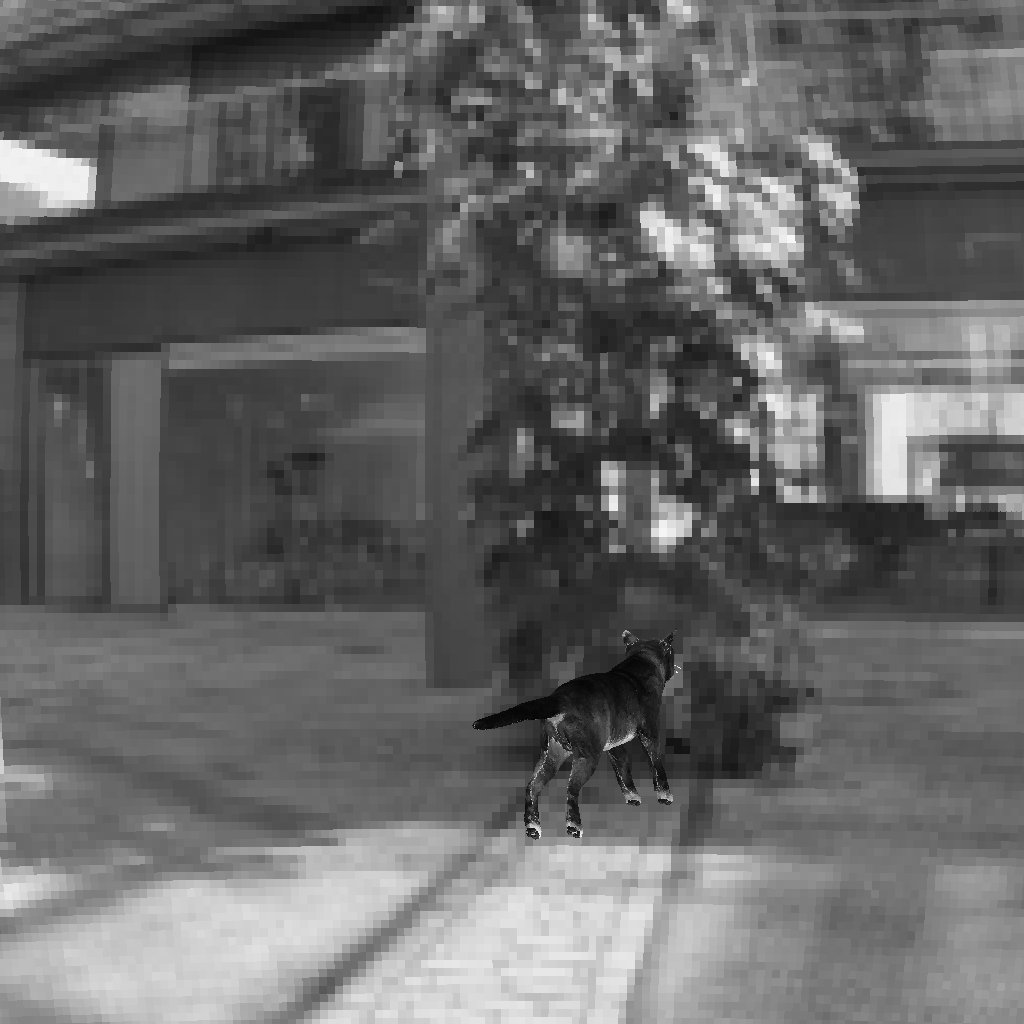

In [99]:
Image(filename=o32f_kf.path)

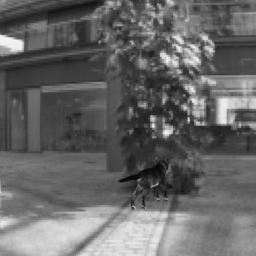

In [100]:
Image(filename=o64_kf.path)

In [102]:
[f.key for f in o32f_list_2 if "pkl" in f.key]

[]

In [103]:
[f.key for f in o32f_list_2 if "3ac64f" in f.key]

['360x360/3ac64fd3d2201ef99edbcf703f5754e2631db7f2.png',
 '3ac64fd3d2201ef99edbcf703f5754e2631db7f2.png',
 'postmask_360x360/3ac64fd3d2201ef99edbcf703f5754e2631db7f2.png']

In [105]:
dirs["nolabels"]

{'04_piano_nolabel.png': None,
 '22_acoustic_guitar_nolabel.png': None,
 '31_african_drums_nolabel.png': None,
 'Colored_shirt_03M_nolabel.png': None,
 'Doctor_pose02_nolabel.png': None,
 'Hanger_02_nolabel.png': None,
 'MB27346_nolabel.png': None,
 'MB27585_nolabel.png': None,
 'MB27780_nolabel.png': None,
 'MB28699_nolabel.png': None,
 'MB29346_nolabel.png': None,
 'MB29822_nolabel.png': None,
 'MB29874_nolabel.png': None,
 'MB30071_nolabel.png': None,
 'MB30203_nolabel.png': None,
 'MB30758_nolabel.png': None,
 'MB30798_nolabel.png': None,
 'MB30850_nolabel.png': None,
 'MB31015_nolabel.png': None,
 'MB31188_nolabel.png': None,
 'MB31405_nolabel.png': None,
 'MB31620_nolabel.png': None,
 'Nurse_pose01_nolabel.png': None,
 'Tie_06_nolabel.png': None,
 'antique_furniture_item_18_nolabel.png': None,
 'build51_nolabel.png': None,
 'bullfrog_nolabel.png': None,
 'calc01_nolabel.png': None,
 'dromedary_nolabel.png': None,
 'face7_nolabel.png': None,
 'fast_food_23_1_nolabel.png': None,
 '

In [106]:
dirs["label_imgs"]

{'04_piano_label.png': None,
 '22_acoustic_guitar_label.png': None,
 '31_african_drums_label.png': None,
 'Colored_shirt_03M_label.png': None,
 'Doctor_pose02_label.png': None,
 'Hanger_02_label.png': None,
 'MB27346_label.png': None,
 'MB27585_label.png': None,
 'MB27780_label.png': None,
 'MB28699_label.png': None,
 'MB29346_label.png': None,
 'MB29822_label.png': None,
 'MB29874_label.png': None,
 'MB30071_label.png': None,
 'MB30203_label.png': None,
 'MB30758_label.png': None,
 'MB30798_label.png': None,
 'MB30850_label.png': None,
 'MB31015_label.png': None,
 'MB31188_label.png': None,
 'MB31405_label.png': None,
 'MB31620_label.png': None,
 'Nurse_pose01_label.png': None,
 'Tie_06_label.png': None,
 'antique_furniture_item_18_label.png': None,
 'build51_label.png': None,
 'bullfrog_label.png': None,
 'calc01_label.png': None,
 'dromedary_label.png': None,
 'face7_label.png': None,
 'fast_food_23_1_label.png': None,
 'flarenut_spanner_label.png': None,
 'foreign_cat_label.png': N

In [109]:
o32f_meta = pd.read_csv("/mindhive/dicarlolab/common/shared_stimuli/meta64.csv")
o32f_meta

,Unnamed: 0,bgname,bgphi,bgpsi,bgscale,category,obj,ryz,rxz,rxy,ty,tz,tx,s,tname,id,texture,texture_mode,internal_canonical
0,0,INTERIOR_12ST.jpg,-22.468604,0.0,1.0,nocategoryset,weimaraner,16.157946,-27.484272,52.521881,0.430379,0.097627,0.0,1.302763,Objectome32,35ab0507ab5f603034389c256bd00e44c24fdbf9,NaN,NaN,1.0
1,1,INTERIOR_14ST.jpg,120.988355,0.0,1.0,nocategoryset,weimaraner,112.380742,-7.208218,-38.597473,-0.454687,-0.886574,0.0,1.177665,Objectome32,f0c0e547dc86429ff866d7a0a70fc3c9f957b9ca,NaN,NaN,1.0
2,2,DH-ITALY30SN.jpg,107.697083,0.0,1.0,nocategoryset,weimaraner,100.136430,133.204373,172.302603,-0.959563,-0.825741,0.0,1.532620,Objectome32,0495127d9e417809d2553b831a59729e95f07e83,NaN,NaN,1.0
3,3,MOUNT_12SN.jpg,-30.721702,0.0,1.0,nocategoryset,weimaraner,-128.392817,160.080810,7.865396,-0.763451,0.561058,0.0,1.339921,Objectome32,eb541936e45de75deed36afed35cc706cd15df61,NaN,NaN,1.0
4,4,MOUNT_03SN.jpg,159.749308,0.0,1.0,nocategoryset,weimaraner,42.348779,40.354460,42.096239,0.136868,-0.087699,0.0,0.718790,Objectome32,0075df27ec0b572184021ff90d233d1c0cdac718,NaN,NaN,1.0
5,5,INTERIOR_24ST.jpg,-118.472549,0.0,1.0,nocategoryset,weimaraner,-144.259074,169.131264,55.130413,0.226127,-0.100100,0.0,1.602349,Objectome32,235d342aab17d7df5679b3aec947b60cf27017fd,NaN,NaN,1.0
6,6,MOUNT_25SN.jpg,-143.263868,0.0,1.0,nocategoryset,weimaraner,25.270837,-22.103455,175.814582,-0.369143,-0.742147,0.0,1.063711,Objectome32,d1216bd86ddf924db232d87c21a0241b06fa0712,NaN,NaN,1.0
7,7,MOUNT_15SN.jpg,-58.317259,0.0,1.0,nocategoryset,weimaraner,-30.827308,-9.108899,44.463636,0.990599,0.270118,0.0,1.281850,Objectome32,09545db724e2bca36588398853e659d7bac7374c,NaN,NaN,1.0
8,8,DH214SN.jpg,121.660167,0.0,1.0,nocategoryset,weimaraner,-47.258939,115.557563,-145.043541,-0.723634,0.312659,0.0,0.896582,Objectome32,0d7e489e4a040b1840dd99039423cdadfb6cdcda,NaN,NaN,1.0
9,9,MOUNT_25SN.jpg,-78.189493,0.0,1.0,nocategoryset,weimaraner,37.744387,86.134889,-165.892395,-0.062698,0.952919,0.0,1.676761,Objectome32,19efa4e778d12c3e7ffbe1bc1450091ff670fbd5,NaN,NaN,1.0


In [ ]:
containing_dir = os.path.dirname(target_zip_path)
with zipfile.ZipFile(target_zip_path, 'r') as new_zip:
    new_zip.extractall(containing_dir)

In [112]:
import peewee
from playhouse.migrate import *

In [113]:
from brainscore.lookup import pwdb

In [114]:
migrator = SqliteMigrator(pwdb)

In [121]:
image_unique_name_field = CharField(unique=True, null=True, index=True)
image_sha1_field = CharField(unique=True, null=True, index=True)
assy_unique_name_field = CharField(unique=True, null=True, index=True)
assy_sha1_field = CharField(unique=True, null=True, index=True)

In [140]:
from brainscore.stimuli import ImageModel, AttributeModel, ImageMetaModel, StimulusSetModel, ImageStoreModel, \
    StimulusSetImageMap, ImageStoreMap

In [119]:
pwdb.get_tables()

['assemblymodel',
 'assemblystoremap',
 'assemblystoremodel',
 'attributemodel',
 'imagemetamodel',
 'imagemodel',
 'imagestoremap',
 'imagestoremodel',
 'stimulussetimagemap',
 'stimulussetmodel']

In [122]:
migrate(
    migrator.add_column('imagestoremodel', 'unique_name', image_unique_name_field),
    migrator.add_column('imagestoremodel', 'sha1', image_sha1_field),
    migrator.add_column('assemblystoremodel', 'unique_name', image_unique_name_field),
    migrator.add_column('assemblystoremodel', 'sha1', image_sha1_field)
)

In [125]:
image_sel = ImageStoreModel.select()
[i.location for i in image_sel]

['https://mkgu-dicarlolab-hvm.s3.amazonaws.com/HvM_with_discfade.zip',
 'https://mkgu-gallant-crcns.s3.amazonaws.com/gallant_crcns_v1_stimuli.zip',
 'https://mkgu-tolias.s3.amazonaws.com/v1_stimuli.zip']

In [126]:
import brainscore

In [127]:
brainscore.fetch._local_data_path

'/braintree/home/jjpr/.brainscore/data'

In [181]:
pwdb.close()

True

In [180]:
pwdb.connect()

True

In [138]:
import importlib
importlib.reload(brainscore.stimuli)

<module 'brainscore.stimuli' from '/braintree/home/jjpr/dev/mkgu/brainscore/stimuli.py'>

In [177]:
[(ism.location, ism.unique_name) for ism in ImageStoreModel.select()]

[('https://mkgu-dicarlolab-hvm.s3.amazonaws.com/HvM_with_discfade.zip', None),
 ('https://mkgu-gallant-crcns.s3.amazonaws.com/gallant_crcns_v1_stimuli.zip',
  'foo'),
 ('https://mkgu-tolias.s3.amazonaws.com/v1_stimuli.zip', None)]

In [189]:
!ls -l $brainscore.fetch._local_data_path

total 280
drwxr-xr-x  2 jjpr dicarlo   4096 Aug 27 17:06 dicarlo.b.h.Rajalingham2018
drwxr-xr-x  5 jjpr dicarlo   4096 Jul 31 16:04 dicarlo.hvm
drwxr-xr-x  2 jjpr dicarlo   4096 Sep 18 15:09 dicarlo.Majaj2015
drwxr-xr-x  2 jjpr dicarlo   4096 Jul 31 15:38 dicarlo.Majaj2015.temporal
drwxr-xr-x 18 jjpr dicarlo   4096 Sep 19 15:39 gallant.David2004
drwxr-xr-x  3 jjpr dicarlo   4096 Jun 11 13:56 gallant.Willmore2010
drwxr-xr-x  2 jjpr dicarlo   4096 Oct 30  2017 HvM
drwxr-xr-x  2 jjpr dicarlo   4096 Oct 25  2017 HvM_temporal
drwxr-xr-x  3 jjpr dicarlo   4096 Aug 15 09:53 tolias.Cadena2017
drwxr-xr-x  3 jjpr dicarlo 245760 Aug 13 14:47 tolias.Cadena2017.bak


In [153]:
!ls $brainscore.fetch._local_data_path/dicarlo.hvm

HvM_with_discfade.zip  Variation03_20110128
Variation00_20110203   Variation06_20110131


In [190]:
!ls $brainscore.fetch._local_data_path/gallant.David2004

gallant_crcns_v1_stimuli.zip	r0154B	r0162B	r0169B	r0208D	r0212B
gallant_v1_single_electrode.nc	r0156A	r0164C	r0170A	r0210A	r0215B
r0148A				r0158A	r0168B	r0206B	r0211A	r0217B


In [155]:
!ls $brainscore.fetch._local_data_path/tolias.Cadena2017

v1_responses.nc  v1_stimuli  v1_stimuli.zip


In [191]:
stim_paths = [
    "/braintree/home/jjpr/.brainscore/data/dicarlo.hvm/HvM_with_discfade.zip",
    "/braintree/home/jjpr/.brainscore/data/gallant.David2004/gallant_crcns_v1_stimuli.zip",
    "/braintree/home/jjpr/.brainscore/data/tolias.Cadena2017/v1_stimuli.zip"
]

In [192]:
stim_kfs = [knownfile.KnownFile(f) for f in stim_paths]
[(kf.sha1, kf.realpath) for kf in stim_kfs]

[('8a4b5ace844b99213319706f68c554d285e7827e',
  '/braintree/home/jjpr/.brainscore/data/dicarlo.hvm/HvM_with_discfade.zip'),
 ('c10ce47134b8b7f0421e81f7a3211970958dc402',
  '/braintree/home/jjpr/.brainscore/data/gallant.David2004/gallant_crcns_v1_stimuli.zip'),
 ('27d081dce5c0e21bf00eba1500d0fdee55d01baa',
  '/braintree/home/jjpr/.brainscore/data/tolias.Cadena2017/v1_stimuli.zip')]

In [157]:
!ls $brainscore.fetch._local_data_path/dicarlo.Majaj2015

hvm_neuronal_features.nc


In [151]:
hvm = brainscore.get_assembly("dicarlo.Majaj2015")
hvm

getting hvm_neuronal_features.nc


<xarray.NeuronRecordingAssembly (neuroid: 296, presentation: 268800, time_bin: 1)>
array([[[ 0.060929],
        [-0.686162],
        ...,
        [-0.968256],
        [ 0.183887]],

       [[-0.725592],
        [ 0.292777],
        ...,
        [ 2.449372],
        [ 0.401197]],

       ...,

       [[ 1.121319],
        [ 1.719423],
        ...,
        [ 0.800551],
        [-0.019874]],

       [[-0.518903],
        [ 0.696196],
        ...,
        [-0.603347],
        [-0.175979]]], dtype=float32)
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - neuroid_id       (neuroid) object 'Chabo_L_M_5_9' 'Chabo_L_M_6_9' ...
  - arr              (neuroid) object 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' ...
  - col              (neuroid) int64 9 9 8 9 8 8 7 7 5 6 4 9 9 9 9 9 8 7 9 6 ...
  - hemisphere       (neuroid) object 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' ...
  - subregion        (neuroid) object 'cIT' 'cIT' 'cIT' 'cIT' 'cIT' 'cIT' ...
  - animal           (neuroid) object 'Chabo' 'Ch

In [188]:
gallant = brainscore.get_assembly("gallant.David2004")
gallant

getting gallant_v1_single_electrode.nc
getting gallant_crcns_v1_stimuli.zip


<xarray.NeuronRecordingAssembly (neuroid: 23, presentation: 189305)>
array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,  0.,  0.,  0.]])
Coordinates:
  * neuroid                   (neuroid) object 'r0148A' 'r0150B' 'r0154B' ...
  * presentation              (presentation) MultiIndex
  - presentation_id           (presentation) int64 0 1 2 3 4 5 6 7 8 9 10 11 ...
  - image_file_path_original  (presentation) object 'r0148A/NatRev.MountLake.40.150.imsm/1.jpg' ...
  - image_id                  (presentation) object '33613a99bdc22fe498864bf32b798e018a961ed7' ...
  - id                        (presentation) int64 29882 71211 63228 49398 ...
  - image_file_sha1           (presentation) object '33613a99bdc22fe498864bf32b798e018a961ed7' ...
  - image_file_path_unique    (presentation) obje

In [193]:
assy_paths = [
    "/braintree/home/jjpr/.brainscore/data/dicarlo.Majaj2015/hvm_neuronal_features.nc",
    "/braintree/home/jjpr/.brainscore/data/dicarlo.Majaj2015.temporal/hvm_temporal_neuronal_features.nc",
    "/braintree/home/jjpr/.brainscore/data/gallant.David2004/gallant_v1_single_electrode.nc",
    "/braintree/home/jjpr/.brainscore/data/tolias.Cadena2017/v1_responses.nc"
]

In [194]:
assy_kfs = [knownfile.KnownFile(f) for f in assy_paths]
[(kf.sha1, kf.realpath) for kf in assy_kfs]

[('b927a6cd3320baffe954313834f73525ab6bc9a1',
  '/braintree/home/jjpr/.brainscore/data/dicarlo.Majaj2015/hvm_neuronal_features.nc'),
 ('4feed57f0cd5e52c41622a8a1080a15184f9d76f',
  '/braintree/home/jjpr/.brainscore/data/dicarlo.Majaj2015.temporal/hvm_temporal_neuronal_features.nc'),
 ('cda1b6fe02fe02462ae804b11f895a4803bd4d4e',
  '/braintree/home/jjpr/.brainscore/data/gallant.David2004/gallant_v1_single_electrode.nc'),
 ('7deae2c6e301aa822f0749bde360bbf966d64a2b',
  '/braintree/home/jjpr/.brainscore/data/tolias.Cadena2017/v1_responses.nc')]

In [ ]:
def find_file(image_store_model):
    data_dir = brainscore.fetch._local_data_path